In [1]:
import ect

import numpy as np
from matplotlib import pyplot as plt    
from matplotlib.axes import Axes
import cv2

from icecream import ic

plt.rcParams["text.usetex"] = True

### Sample images

In [2]:
def gray2rgb(image: np.ndarray) -> np.ndarray:
    return cv2.merge([image, image, image])

In [3]:
def square_grid(
    dsize: tuple[int, int], 
    step: int, 
    thickness: int = 1
) -> np.ndarray:
    '''
    Generates square grid of size [dsize]
    with parametrized step.

    Outputs grid as grayscale image.
    '''
    out: np.ndarray = np.ones(dsize, dtype=float)

    # x grid
    for x in range(0, dsize[1]+1, step):
        # ic(x)
        out = cv2.line(out, (x, 0), (x, dsize[0]), (0), thickness)
    
    # y grid
    for y in range(0, dsize[0]+1, step):
        # ic(y)
        out = cv2.line(out, (0, y), (dsize[1], y), (0), thickness)
    
    return out

In [4]:
def circular_grid(
    dsize: tuple[int, int], 
    radius_step: int, 
    angle_step_deg: int,
    thickness: int = 1
) -> np.ndarray:
    '''
    Generates circular grid of size [dsize]
    centered at middle of the image and
    parametrized radius and angle step.

    Outputs grid as grayscale image.
    '''
    out: np.ndarray = np.ones(dsize, dtype=float)
    xc, yc = dsize[0]//2, dsize[1]//2

    max_radius = max(xc, yc)

    for r in range(0, max_radius+1, radius_step):
        # ic(xc, yc, r)
        out = cv2.circle(out, (xc, yc), r, (0), thickness)
    
    for ang in range(0, 360, angle_step_deg):
        phi: float = np.pi * ang / 180
        px: int = int(xc + max_radius*np.cos(phi))
        py: int = int(yc + max_radius*np.sin(phi))
        # ic((xc, yc), (px, py), ang)
        out = cv2.line(out, (xc, yc), (px, py), (0), thickness)
    
    return out


In [5]:
def square(
    dsize: tuple[int, int], 
    center: tuple[int, int], 
    edge: int,
    thickness: int = 1
) -> np.ndarray:
    '''
    Generates a white image with a black square
    centered at [center], with edge length [edge]
    
    Outputs a grayscale image.
    '''
    out: np.ndarray = np.ones(dsize, dtype=float)
    xc, yc = center
    c1x, c1y = xc - edge//2, yc - edge//2
    c2x, c2y = xc + edge//2, yc + edge//2

    return cv2.rectangle(out, (c1x, c1y), (c2x, c2y), (0), thickness)



### Display

In [6]:
IMG_TITLE = "Obraz źródłowy"
LOG_TITLE = "Obraz przekształcony"

XAXIS_IMG = "x [px]" 
YAXIS_IMG = "y [px]"

XAXIS_LOG = "$\\rho$ [px]"
YAXIS_LOG = "$\\varphi$ [deg]"

def display_logpolar(image: np.ndarray, logimg: np.ndarray, step: int, radius: int):

    fig, axd = plt.subplot_mosaic([["img", "log"]], width_ratios=[2.3, 1])

    fig.set_figwidth(12)
    fig.set_figheight(7.5)
    
    ax1: Axes = axd["img"]
    ax1.imshow(image)
    ax1.set_title(IMG_TITLE)
    ax1.set_xlabel(XAXIS_IMG)
    ax1.set_ylabel(YAXIS_IMG)
    ax1.set_xticks([x for x in range(0, image.shape[1]+1, step)])
    ax1.set_yticks([x for x in range(0, image.shape[0]+1, step)])

    ax2: Axes = axd["log"]
    ax2.imshow(logimg)
    ax2.set_title(LOG_TITLE)
    ax2.set_xlabel(XAXIS_LOG)
    ax2.set_ylabel(YAXIS_LOG)
    ax2.set_xticks([0, logimg.shape[1]])
    ax2.set_xticklabels([str(x) for x in range(0, radius+1, radius)])
    ax2.set_yticks([x for x in range(0, image.shape[0]+1, image.shape[0]//8)])
    ax2.set_yticklabels([str(x) for x in range(0, 361, 45)])    

### Examples

In [7]:
SIZE = 1000
STEP = 50
RADIUS = 250
ANGLE = 90
THICK = 3

# SIZE = 100
# STEP = 10
# ANGLE = 45
# THICK = 1

def apply_lp(img: np.ndarray, radius: int, cfg: ect.Config = None):
    if cfg is None:
        cfg = ect.Config(logpolar_mode="omit", logpolar_interpolation="bilinear")
    xc = img.shape[1]//2
    yc = img.shape[0]//2
    radius = max(xc, yc)
    dsize = (img.shape[0], int(img.shape[0]/np.pi))
    return ect.logpolar_new(img, (xc, yc), dsize, radius, cfg)


2024-04-29 17:28:10.682 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-04-29 17:28:10.726 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping


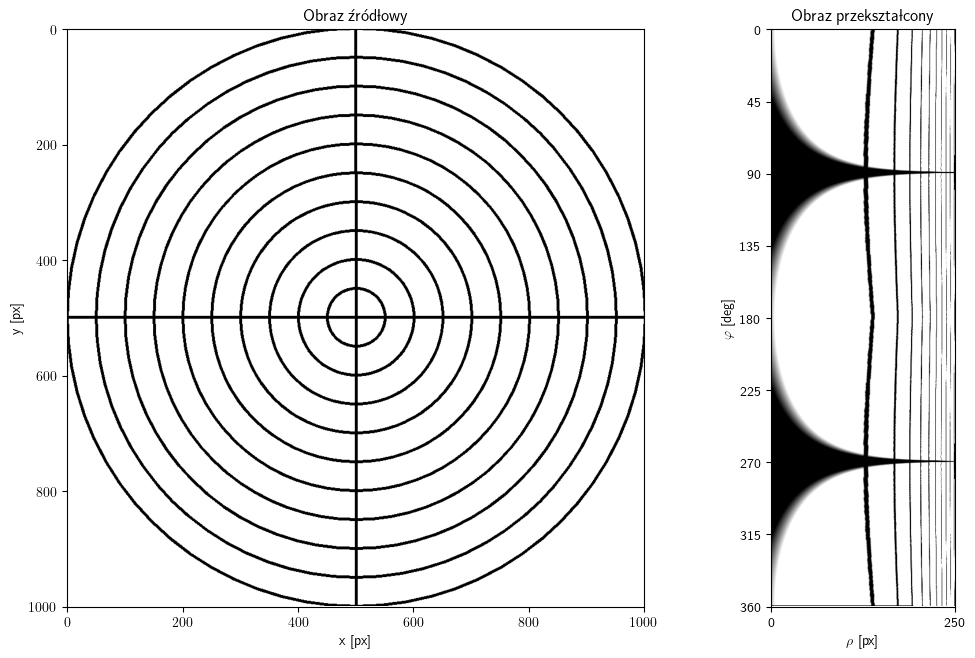

In [8]:
img = circular_grid((SIZE, SIZE), STEP, 90, THICK)
logimg = apply_lp(img, RADIUS)

img = gray2rgb(img)
logimg = gray2rgb(logimg)
display_logpolar(img, logimg, STEP*4, RADIUS)

2024-04-29 17:28:11.853 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-04-29 17:28:11.877 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping


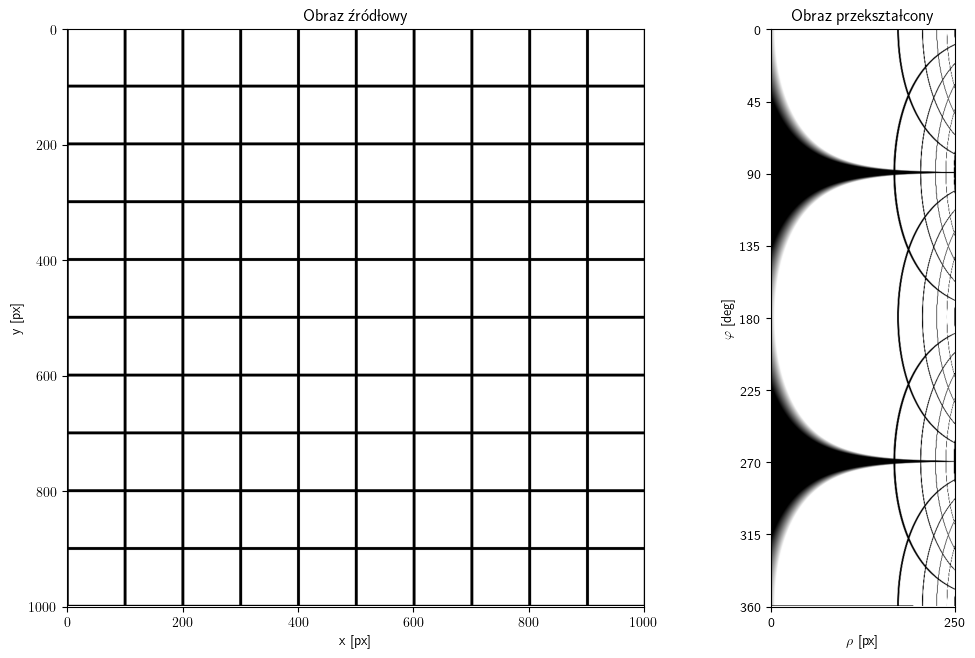

In [9]:
img = square_grid((SIZE, SIZE), STEP*2, THICK)
logimg = apply_lp(img, RADIUS)

img = gray2rgb(img)
logimg = gray2rgb(logimg)
display_logpolar(img, logimg, STEP*4, RADIUS)

2024-04-29 17:28:12.836 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-04-29 17:28:12.860 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping


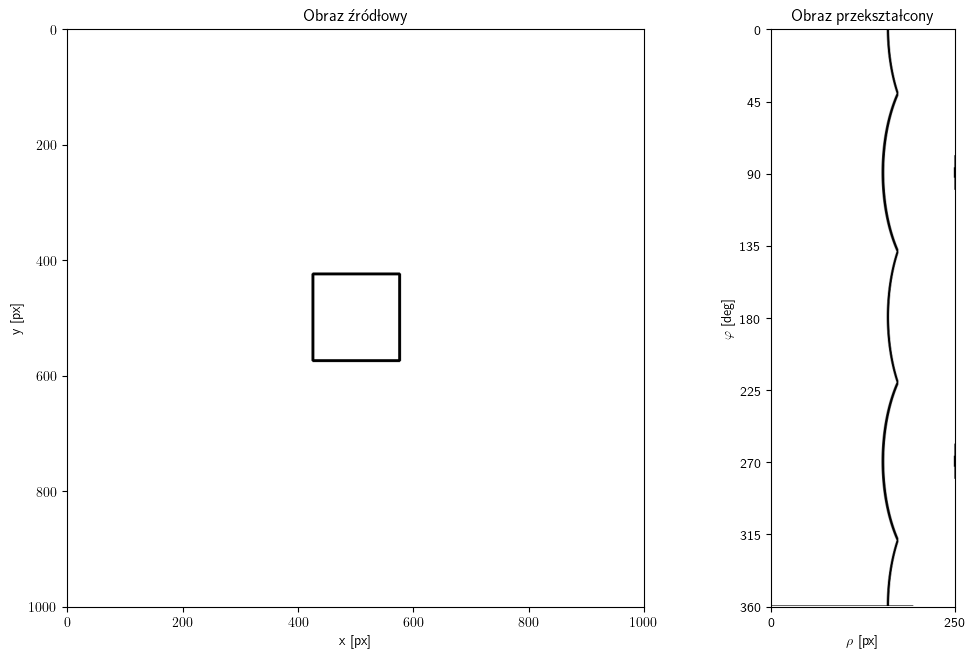

In [10]:
img = square((SIZE, SIZE), (SIZE//2, SIZE//2), STEP*3, THICK)

logimg = apply_lp(img, RADIUS)

img = gray2rgb(img)
logimg = gray2rgb(logimg)
display_logpolar(img, logimg, STEP*4, RADIUS)

2024-04-29 17:28:13.836 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-04-29 17:28:13.859 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping


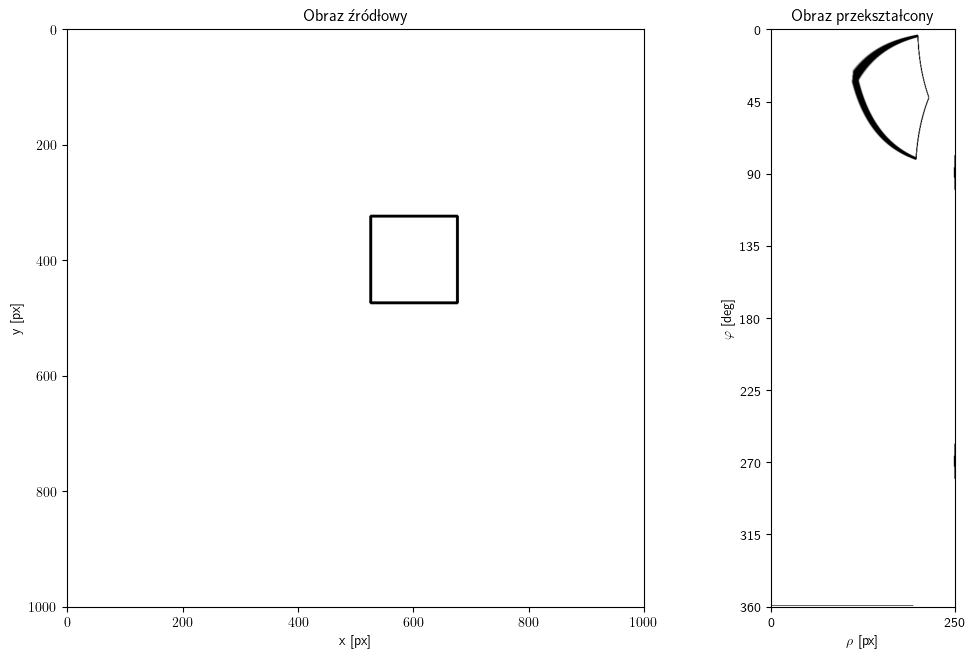

In [11]:
img = square((SIZE, SIZE), (SIZE//2+2*STEP, SIZE//2-2*STEP), STEP*3, THICK)
logimg = apply_lp(img, RADIUS)

img = gray2rgb(img)
logimg = gray2rgb(logimg)
display_logpolar(img, logimg, STEP*4, RADIUS)

2024-04-29 17:28:14.795 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10


2024-04-29 17:28:14.805 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


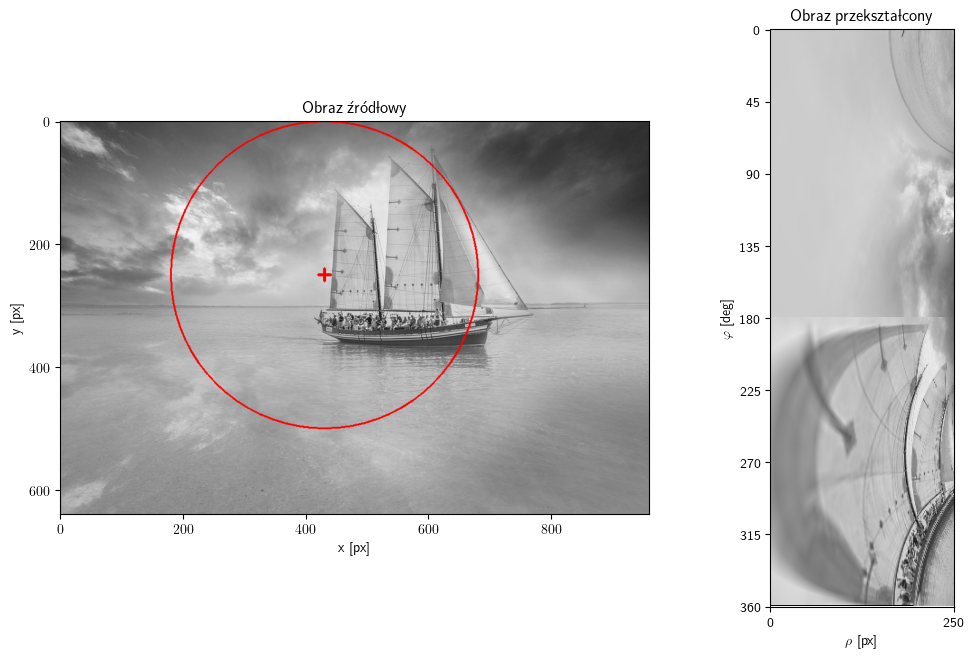

In [12]:
img = cv2.imread("../library_tests/sample_images/sailboat.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)/255

center = (430, 250)
radius = 250

cfg = ect.Config(logpolar_mode="omit", logpolar_interpolation="bilinear", start_angle_deg=-90)
dsize = (img.shape[0], int(img.shape[0]/np.pi))
logimg = ect.logpolar_new(img, center, dsize, radius, cfg)

img = gray2rgb(img)
logimg = gray2rgb(logimg)

img = cv2.drawMarker(img, center, (255, 0, 0), cv2.MARKER_CROSS, markerSize=20, thickness=3)
img = cv2.circle(img, center, radius, (255, 0, 0), thickness=2)
display_logpolar(img, logimg, STEP*4, RADIUS)

### Logpolar variants

#### opencv

2024-04-29 17:28:15.510 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=3
2024-04-29 17:28:15.538 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping


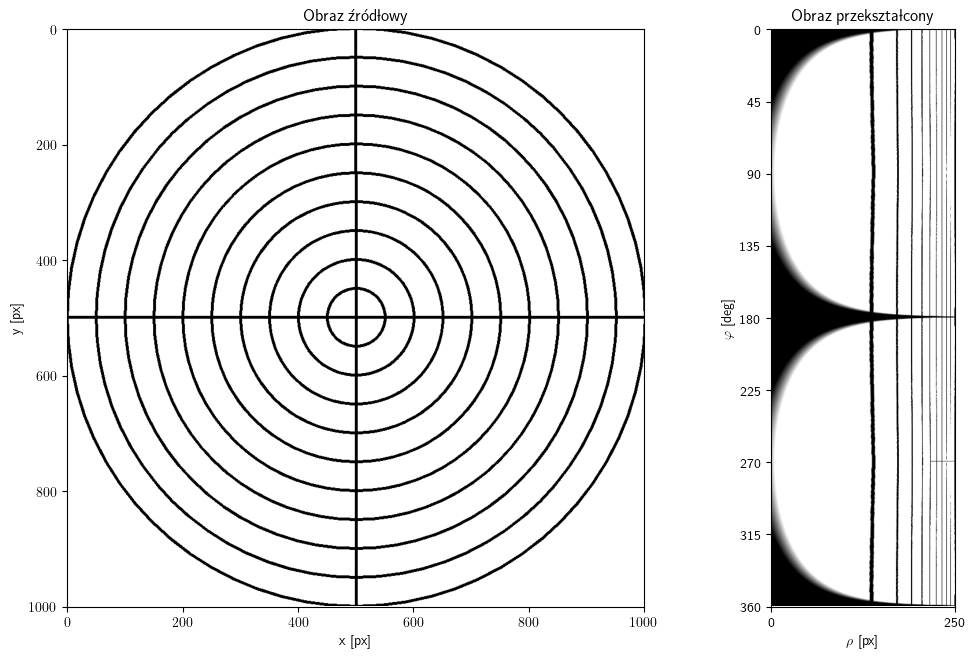

In [13]:
img = circular_grid((SIZE, SIZE), STEP, ANGLE, THICK)

cfg = ect.Config(logpolar_mode="opencv", offset_value_px=3, start_angle_deg=0)
logimg = apply_lp(img, RADIUS, cfg=cfg)

img = gray2rgb(img)
logimg = gray2rgb(logimg)
display_logpolar(img, logimg, STEP*4, RADIUS)

#### offset

2024-04-29 17:28:16.511 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-04-29 17:28:16.530 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping


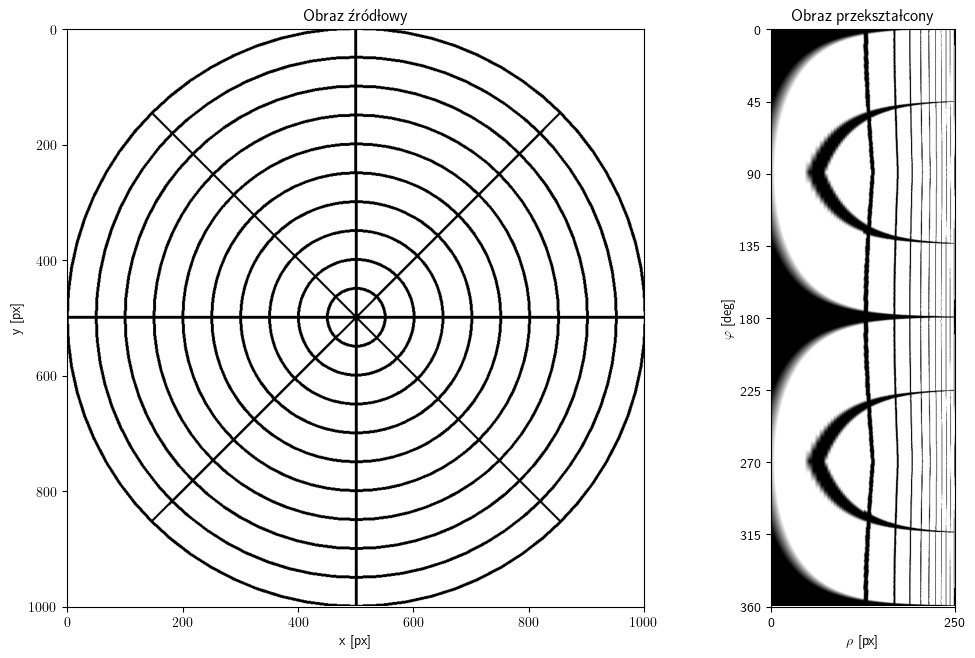

In [14]:
img = circular_grid((SIZE, SIZE), STEP, 45, THICK)

cfg = ect.Config(logpolar_mode="offset", offset_value_px=10, start_angle_deg=0)
logimg = apply_lp(img, RADIUS, cfg=cfg)

img = gray2rgb(img)
logimg = gray2rgb(logimg)
display_logpolar(img, logimg, STEP*4, RADIUS)

### Inverse Transform

2024-04-29 17:28:17.148 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-04-29 17:28:17.154 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping
2024-04-29 17:28:17.176 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:78 - Running logpolar transform in offset mode
2024-04-29 17:28:17.212 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:94 - Applying bilinear pixel mapping


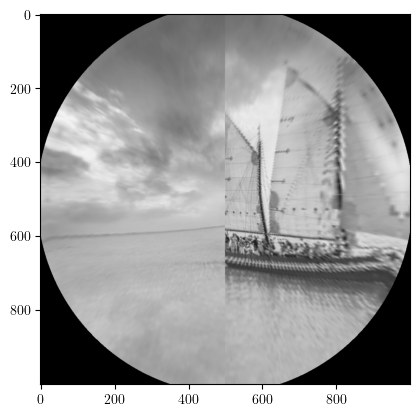

In [15]:
import ect

import numpy as np
from matplotlib import pyplot as plt    
from matplotlib.axes import Axes
import cv2

from icecream import ic

plt.rcParams["text.usetex"] = True

img = cv2.imread("../library_tests/sample_images/sailboat.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)/255

center = (430, 250)
radius = 250
dsize = (1256, 1000)

cfg = ect.Config(logpolar_mode="omit")
dsize = (img.shape[0], int(img.shape[0]/np.pi))
logimg = ect.logpolar_new(img, center, dsize, radius, cfg)
invimg = ect.ilogpolar_new(logimg, (1000, 1000), radius, cfg)

invimg = gray2rgb(invimg)
plt.imshow(invimg)

# img = cv2.drawMarker(img, center, (255, 0, 0), cv2.MARKER_CROSS, markerSize=20, thickness=3)
# img = cv2.circle(img, center, radius, (255, 0, 0), thickness=2)
# display_logpolar(img, logimg, STEP*4, RADIUS)

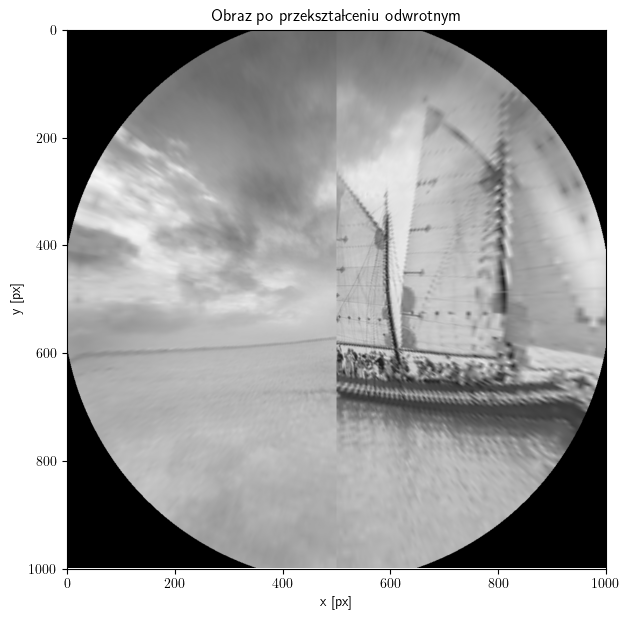

In [16]:
fig = plt.figure()
fig.set_figwidth(7)
fig.set_figheight(7)

ax1: Axes = plt.axes()
ax1.imshow(invimg)
ax1.set_title("Obraz po przekształceniu odwrotnym")
ax1.set_xlabel(XAXIS_IMG)
ax1.set_ylabel(YAXIS_IMG)
ax1.set_xticks([x for x in range(0, invimg.shape[1]+1, STEP*4)])
ax1.set_yticks([x for x in range(0, invimg.shape[0]+1, STEP*4)])
